# Objective
## Focus: Exploring Olympics Swimming events

## Purpose: Using athletes data to determine medal winners in the swimming events

### *Import necessary Libraries*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## 1. Load Data and merge 2 files

In [4]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
merged = pd.merge(athlete,region, on = 'NOC', how='left')

In [5]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


*Extract Swimming Data*

In [7]:
swimming = pd.DataFrame(merged[merged['Sport']=='Swimming'])
print("Swimming Data Dimension:",swimming.shape)
print("Type:",type(swimming))
swimming.head()

Swimming Data Dimension: (23195, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


In [8]:
print(swimming.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object


## 2. Exploratory Analysis 

### a) General Overview

In [9]:
# Information about variables
swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 29 to 271088
Data columns (total 17 columns):
ID        23195 non-null int64
Name      23195 non-null object
Sex       23195 non-null object
Age       22671 non-null float64
Height    19150 non-null float64
Weight    18804 non-null float64
Team      23195 non-null object
NOC       23195 non-null object
Games     23195 non-null object
Year      23195 non-null int64
Season    23195 non-null object
City      23195 non-null object
Sport     23195 non-null object
Event     23195 non-null object
Medal     3048 non-null object
region    23048 non-null object
notes     515 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


Swimming sport only takes place in Summer Olympic Games

In [10]:
swimming['Season'].unique()

array(['Summer'], dtype=object)

### *Atheletes participation for Swimming over Years*

Text(0.5, 1.0, 'Olympics swimming over years')

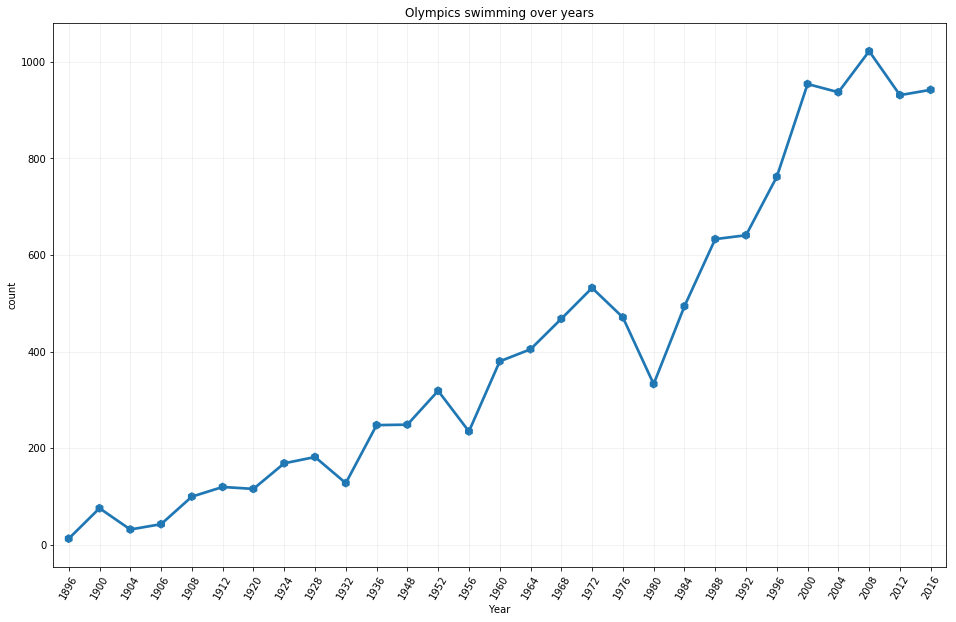

In [11]:
swim_c = swimming.groupby('Year')['ID'].nunique().reset_index()

fig = plt.figure(figsize=(16,10))
sb.pointplot(x = swim_c['Year'],y=swim_c['ID'],markers="h")
plt.xticks(rotation = 60)
plt.grid(True,alpha=.2)
plt.ylabel('count')
plt.title('Olympics swimming over years')

##### One of the reasons for fluctuation:
There were some boycotts that makes the number of participated countries fluctuated
For example, in 1956, Iraq, Lebanon and Egypt boycotted the games in protest at the British, French and Israeli invasion of Egypt. And in 1980, 50 western nations protest against Russia's invasion of Afghanistan by boycotting the Moscow games

### *Swimming participation by gender*

Women participated in Olympics swimming for the first time at 1912 Summer Olympics. It was the first appearance of a women's event in Olympic Swimming.

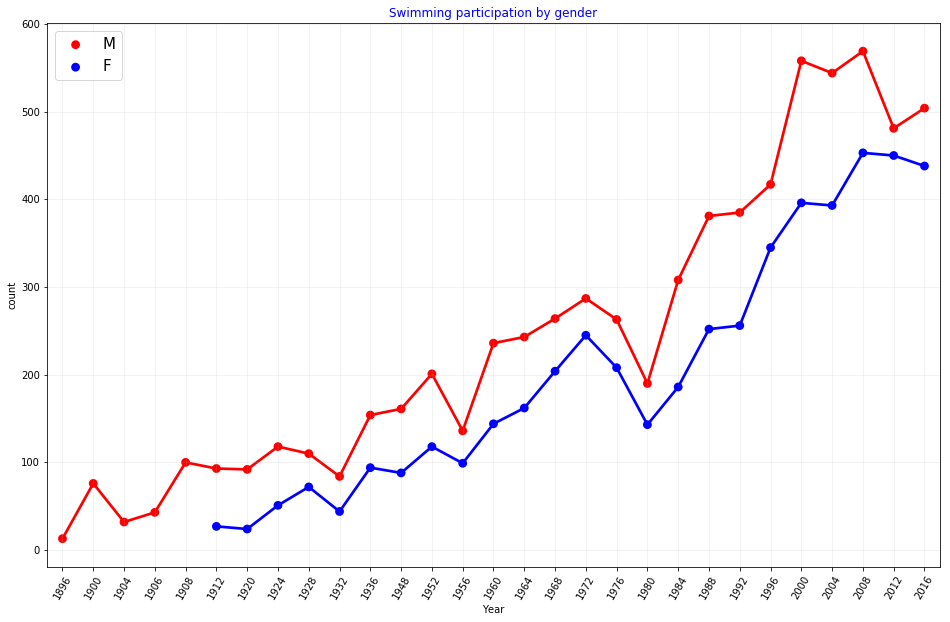

In [12]:
swim_gc = swimming.groupby(["Year","Sex"])["ID"].nunique().reset_index()

fig= plt.figure(figsize=(16,10))
sb.pointplot(x=swim_gc['Year'],y=swim_gc['ID'],hue = swim_gc['Sex'],palette = ["r","b"])
plt.grid(True,alpha = .2)
plt.xticks(rotation =60)
plt.ylabel("count")
plt.title("Swimming participation by gender",color='b')
plt.legend(loc = 'best', prop ={'size':15})

### *Countries participation at the Olympic Games*
Nations, as represented by National Olympic Committees (NOCS), that have participated in the Summer Olympic Games between 1896 and 2016

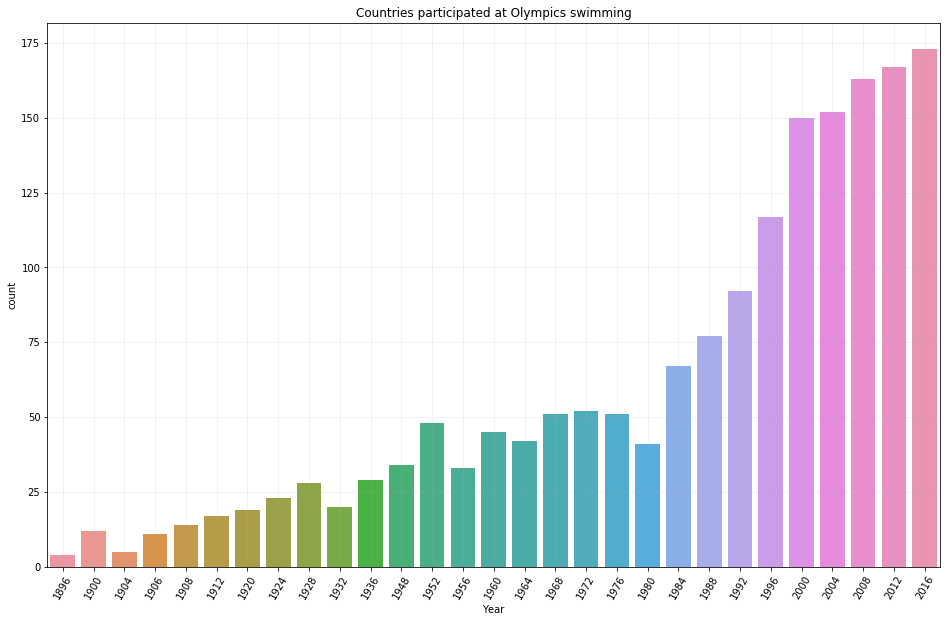

In [13]:
plt.figure(figsize=(16,10))
country_c = swimming.groupby('Year')['NOC'].nunique().reset_index()

sb.barplot(x='Year',y='NOC',data=country_c)
plt.xticks(rotation = 60)
plt.ylabel('count')
plt.title('Countries participated at Olympics swimming')
plt.grid(True,alpha =.2)

### *Nations with highest number of participation in Olympics swimming*

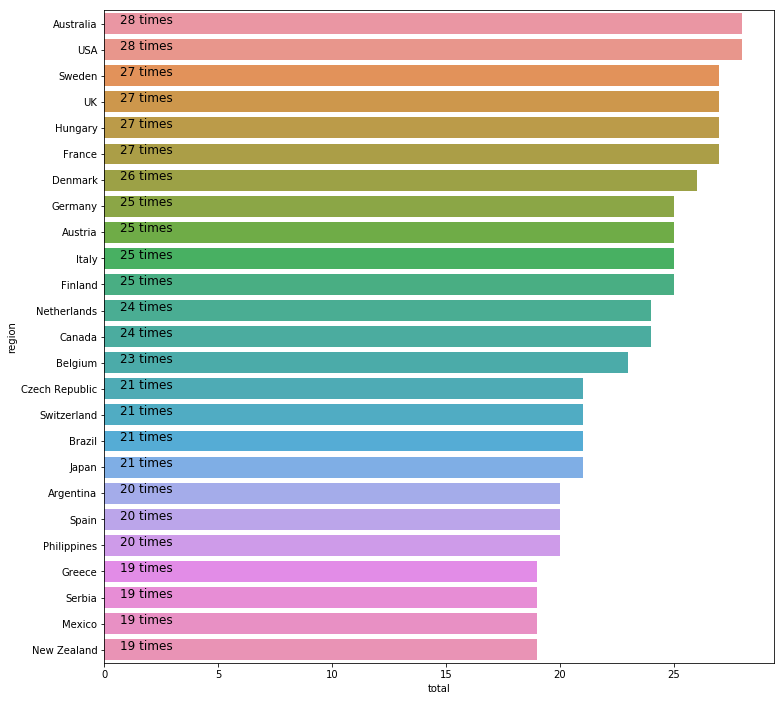

In [14]:
yr_cn = pd.crosstab(swimming['region'],swimming['Year']).reset_index()
for i in yr_cn.columns[1:]:
    yr_cn[i]= yr_cn[i].apply(lambda x: 1 if x>0 else 0)
yr_cn['total'] = yr_cn[yr_cn.columns[1:]].sum(axis=1)
yr_cn = yr_cn.sort_values(by='total',ascending=False)

plt.figure(figsize=(12,12))
yr_cn_plot = sb.barplot('total','region',data=yr_cn[:25])

for i,j in enumerate(yr_cn['total'][:25].astype(str)+" times"):
    yr_cn_plot.text(.7,i,j,fontsize=12)

### *Number of participation using map*

In [15]:
cn_map = yr_cn[['region','total']]
trace = go.Choropleth(locations = cn_map['region'],
                     locationmode='country names',
                     z = cn_map['total'],
                     colorscale = "Picnic",
                     autocolorscale = False,
                     reversescale= True,
                     marker = dict(line=dict(width=1,color="black")),
                     colorbar = dict(title="Count of Participation",titleside="right"))
data = [trace]
layout = go.Layout(dict(title='Countries participation in Olympics swimming',
                       geo = dict(showframe=True,
                                 showocean = True,
                                 oceancolor = '#10223A',
                                 bgcolor = "rgb(255,204,51)",
                                 showcoastlines = True,
                                 projection = dict(type='equirectangular'))))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### *Height, Weight and Age Distribution*

In [16]:
swimming[['Age','Height','Weight']].describe().round(2)

,Age,Height,Weight
count,22671.00,19150.00,18804.00
mean,20.57,178.56,70.59
std,3.74,9.90,11.33
min,11.00,131.00,39.00
25%,18.00,171.00,62.00
50%,20.00,178.00,70.00
75%,23.00,185.00,79.00
max,46.00,209.00,114.00


/home/nhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



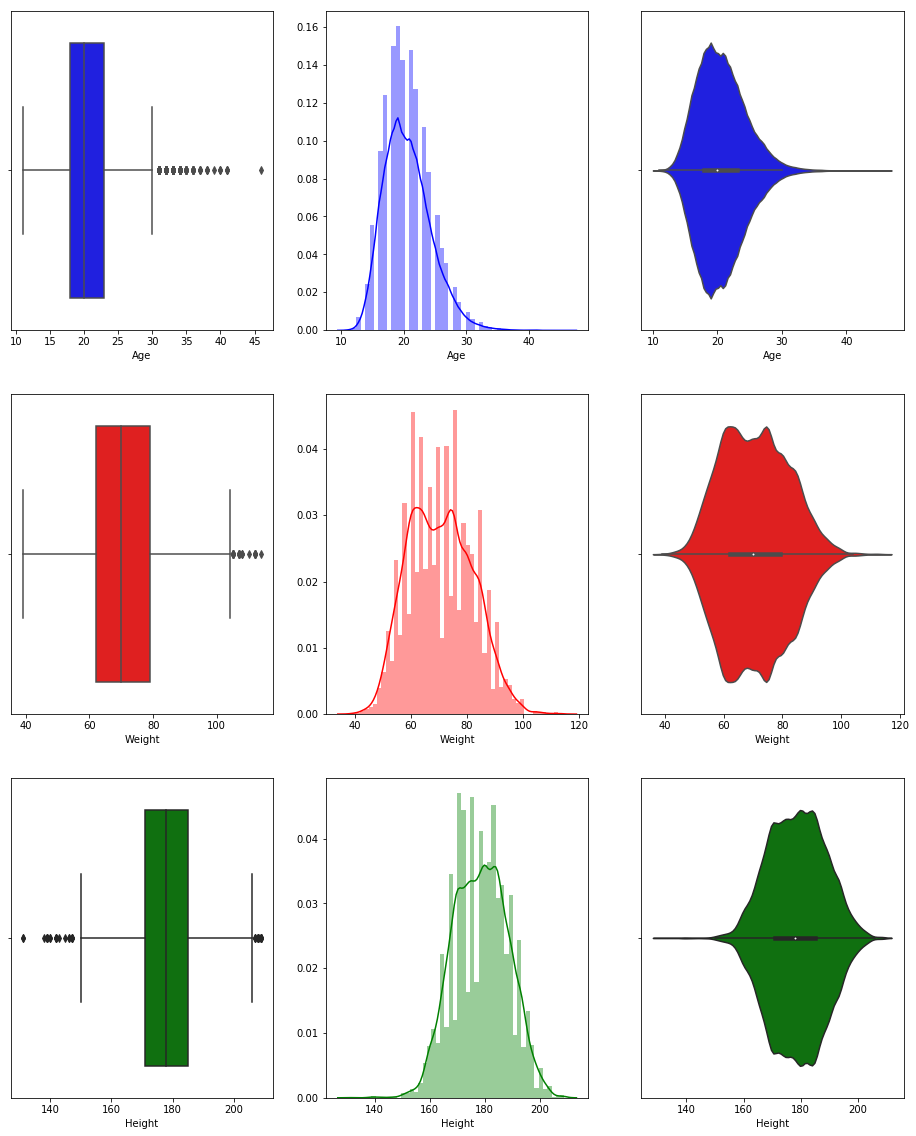

In [17]:
cols = ['Age','Weight','Height']
clr =['b','r','g']
fig,axes = plt.subplots(3,3,figsize=(16,20))
count =0
for i in cols:
    sb.boxplot(swimming[swimming[i].notnull()][i],color=clr[count],ax=axes[count][0])
    sb.distplot(swimming[swimming[i].notnull()][i],color=clr[count],ax=axes[count][1])
    sb.violinplot(swimming[swimming[i].notnull()][i],color=clr[count],ax=axes[count][2])
    count +=1

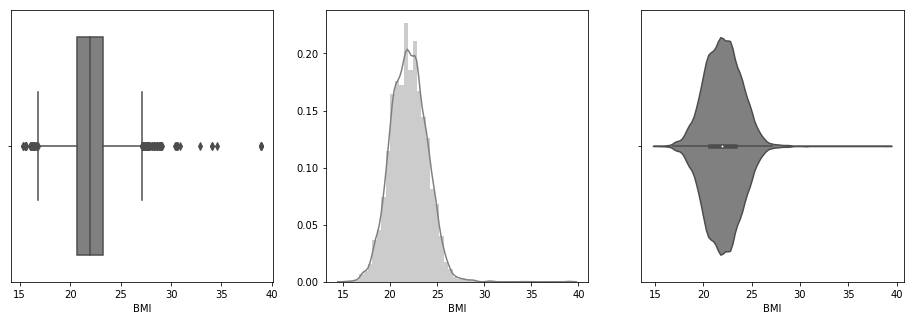

In [18]:
metric_data = swimming[(swimming['Height'].notnull()) & 
                      (swimming['Weight'].notnull())]
metric_data['BMI'] = metric_data['Weight']/((metric_data['Height']/100)**2)
fig,axes = plt.subplots(1,3,figsize=(16,5))
sb.boxplot(metric_data['BMI'],color='grey',ax=axes[0])
sb.distplot(metric_data['BMI'],color='grey',ax=axes[1])
sb.violinplot(metric_data['BMI'],color='grey',ax=axes[2])
    

*Strong correlation between height and weight*

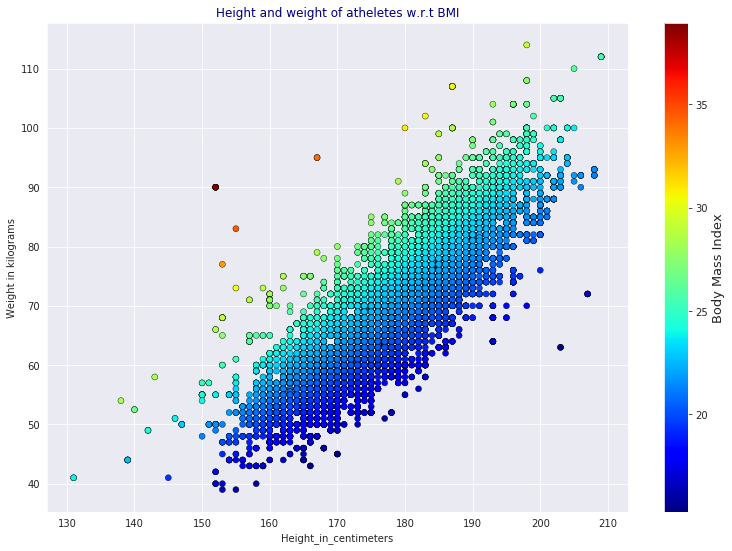

In [19]:
plt.figure(figsize=(13,9))
sb.set_style("darkgrid")
plt.scatter(metric_data["Height"],metric_data["Weight"],cmap="jet",
            c=metric_data["BMI"],linewidth=.4,edgecolor = "k")
lab = plt.colorbar()
lab.set_label("Body Mass Index",fontsize = 13)
plt.xlabel("Height_in_centimeters")
plt.ylabel("Weight in kilograms")
plt.title("Height and weight of atheletes w.r.t BMI",color = "navy")
plt.show()

### *Average of Age, Height, Weight and BMI over times*

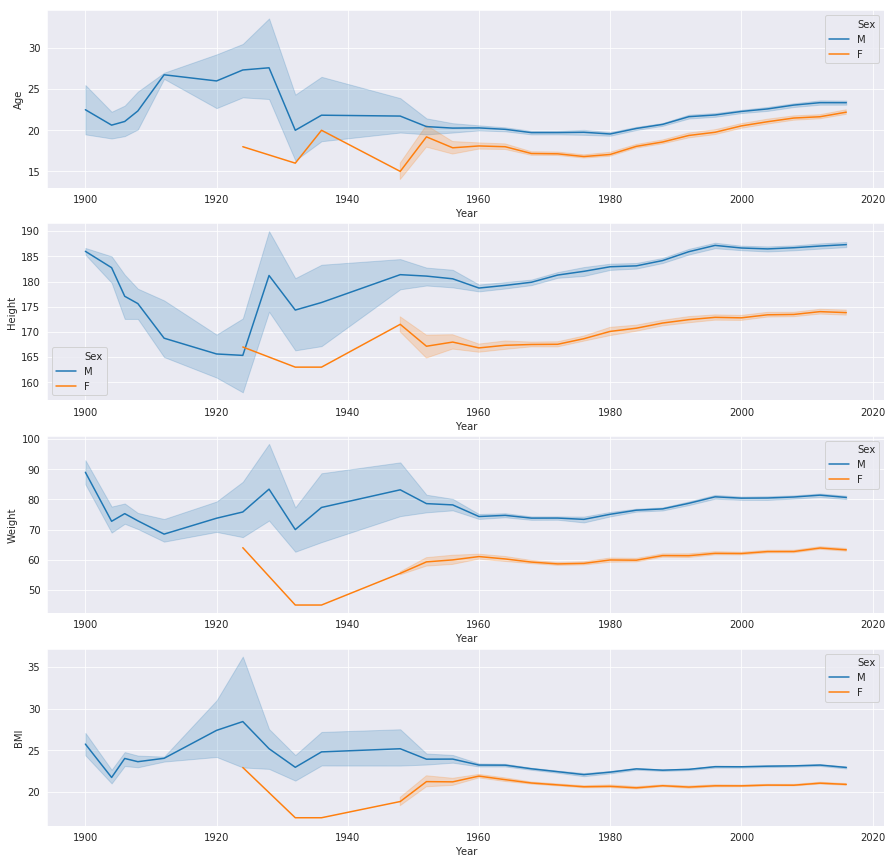

In [20]:
fig, axes = plt.subplots(4,1,figsize=(15, 15))
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex',data=metric_data)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex',data=metric_data)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex',data=metric_data)
sb.lineplot(ax = axes[3], x='Year',y='BMI',hue='Sex',data=metric_data)

### End of general overview

### b) Plot factors that affect type of medal

In [22]:
medals = pd.DataFrame(swimming)
medalOverYears = medals.copy()
medalOverYears['Medal'].fillna(value='No Medal',inplace=True)
medalOverYears['Medal'].replace(['Gold','Silver','Bronze'],'Medalist',inplace=True)
mcolors = ['xkcd:bronze',  'xkcd:silver','xkcd:yellow']

### *Non-medalists vs Medalist*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

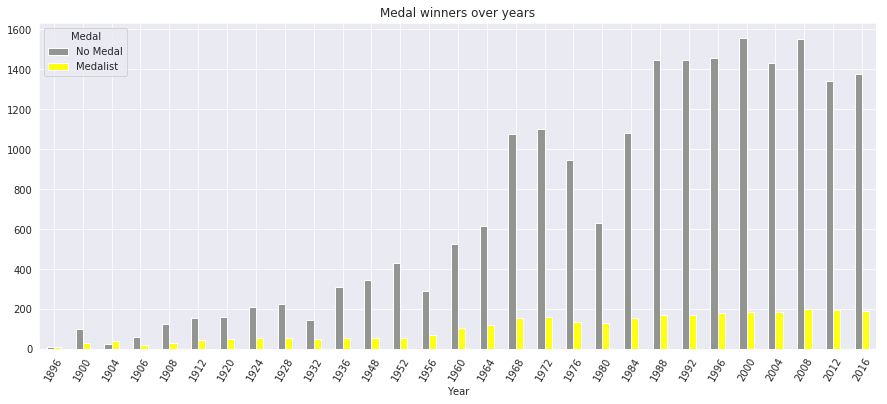

In [23]:
(medalOverYears.groupby(['Year','Medal'])['Medal'].count().unstack())[['No Medal','Medalist']].plot(kind='bar',color=['xkcd:grey','xkcd:yellow'],figsize=(15,6))
plt.title('Medal winners over years')
plt.xticks(rotation=60)

### *Medal Winners by Gender*

(array([0, 1]), <a list of 2 Text xticklabel objects>)

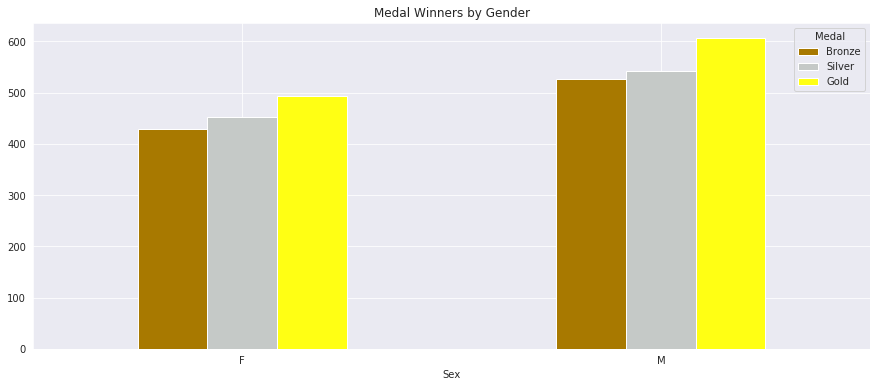

In [24]:
(medals.groupby(["Sex","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by Gender')
plt.xticks(rotation=0)

Gender is a quite good estimator

### *Medal Winners by Age*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

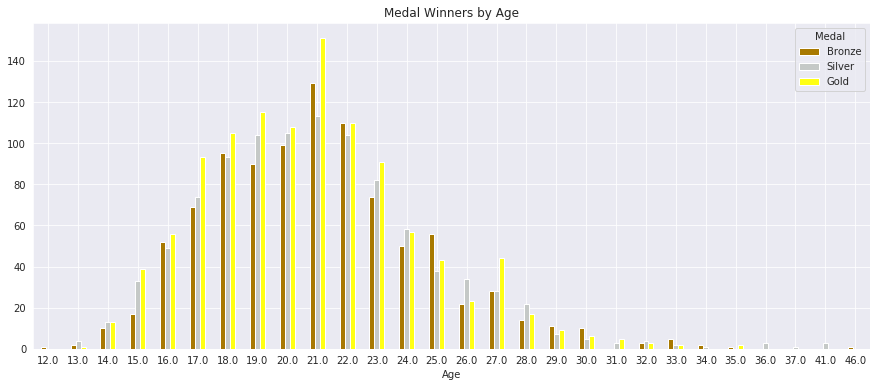

In [25]:
(medals.groupby(["Age","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners by Age')
plt.xticks(rotation=0)

Age is a good estimator for type of medals

### *Medal Winners by Age*

In [26]:
def weightGroup(item):
    if item<=50:
        return '<50kg'
    elif 50<item<=60:
        return '50kg-60kg'
    elif 60<item<=70:
        return '60kg-70kg'
    elif 70<item<=80:
        return '70kg-80kg'
    elif 80<item<=90:
        return '80kg-90kg'
    elif 90<item<=100:
        return '90kg-100kg'
    elif item>100:
        return '>100kg'
    

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

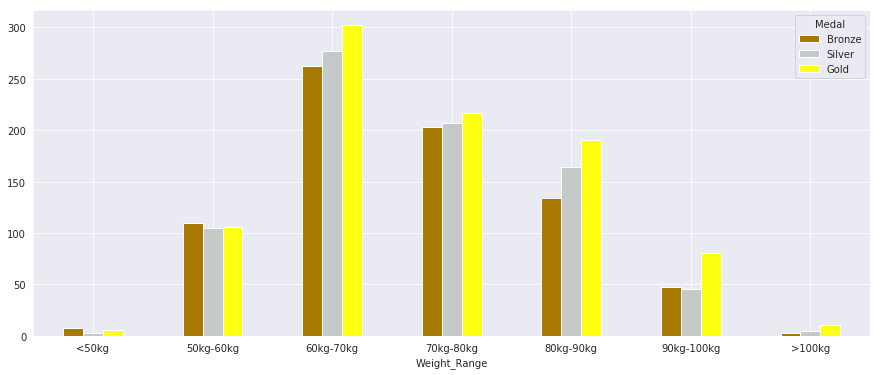

In [27]:
medals['Weight_Range'] = medals.apply(
    lambda row: weightGroup(row['Weight']),axis=1)

rearrange = medals.groupby(['Weight_Range', 'Medal'])['Medal'].count().unstack()
rearrange = rearrange[['Bronze','Silver','Gold']].reindex(['<50kg','50kg-60kg','60kg-70kg','70kg-80kg','80kg-90kg','90kg-100kg','>100kg']).plot(kind='bar',color=mcolors,figsize=(15,6))
plt.xticks(rotation=0)

Weight is a good estimator 

### *Medal Winners by Weight*

In [28]:
def heightGroup(item):
    if item<=160:
        return '<160'
    elif 160<item<=170:
        return '160-170'
    elif 170<item<=180:
        return '170-180'
    elif 180<item<=190:
        return '180-190'
    elif 190<item<=200:
        return '190-200'
    elif item>200:
        return '>200'

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

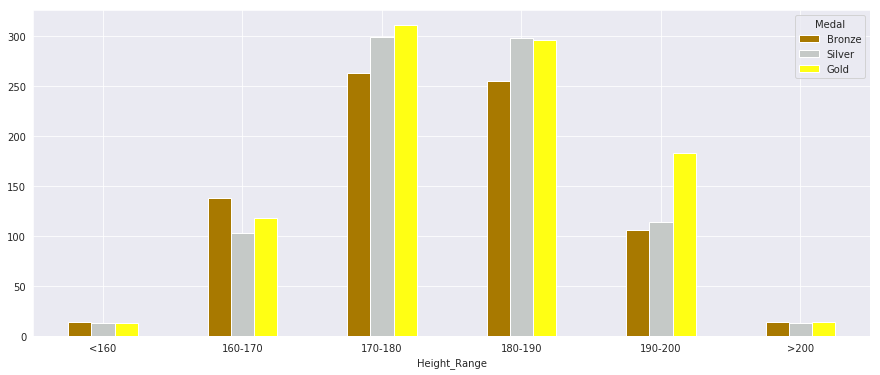

In [29]:
medals['Height_Range'] = medals.apply(
    lambda row: heightGroup(row['Height']),axis=1)

rearrange = medals.groupby(['Height_Range', 'Medal'])['Medal'].count().unstack()
rearrange = rearrange[['Bronze','Silver','Gold']].reindex(['<160','160-170','170-180','180-190','190-200','>200']).plot(kind='bar',color=mcolors,figsize=(15,6))
plt.xticks(rotation=0)

Height is a good estimator

### *Fun fact*

In Singapore, Schooling is considered to be an anomaly since he was the very first Singaporean to win the GOld medal at the Olympics.

However, based on the plot, height and weight actually falls within the range that won the most medals.

In [30]:
sg =medals[(medals.NOC == 'SGP') & (medals.Medal == 'Gold')]
sg.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Weight_Range,Height_Range
213955,107436,Joseph Isaac Schooling,M,21.0,184.0,74.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Gold,NaN,NaN,70kg-80kg,180-190


### *Medal Winners by Country*

Text(0.5, 1.0, 'Medals per Country')

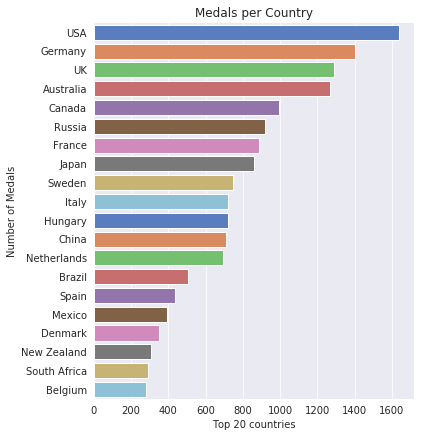

In [31]:
toplist = medals.region.value_counts().reset_index(name='Medal').head(20)
g = sb.catplot(y="index", x="Medal", data=toplist,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 20 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

### *Medal Winners over Year*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

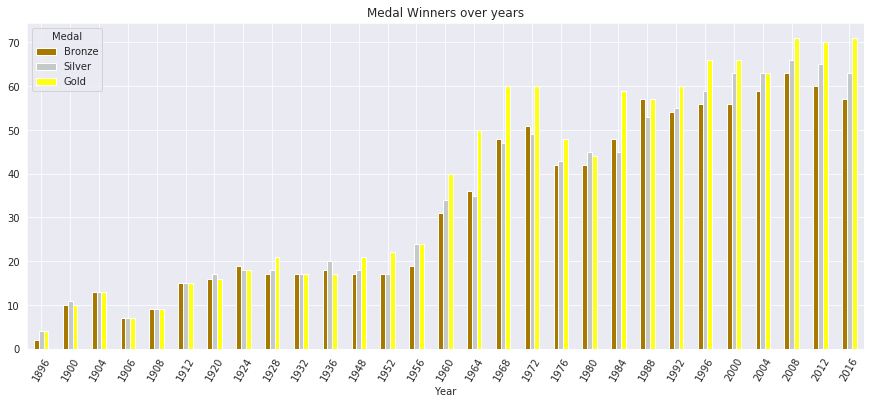

In [32]:

(medals.groupby(["Year","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=mcolors,figsize=(15,6))
plt.title('Medal Winners over years')
plt.xticks(rotation=60)

### *Medal Winners by Event*

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

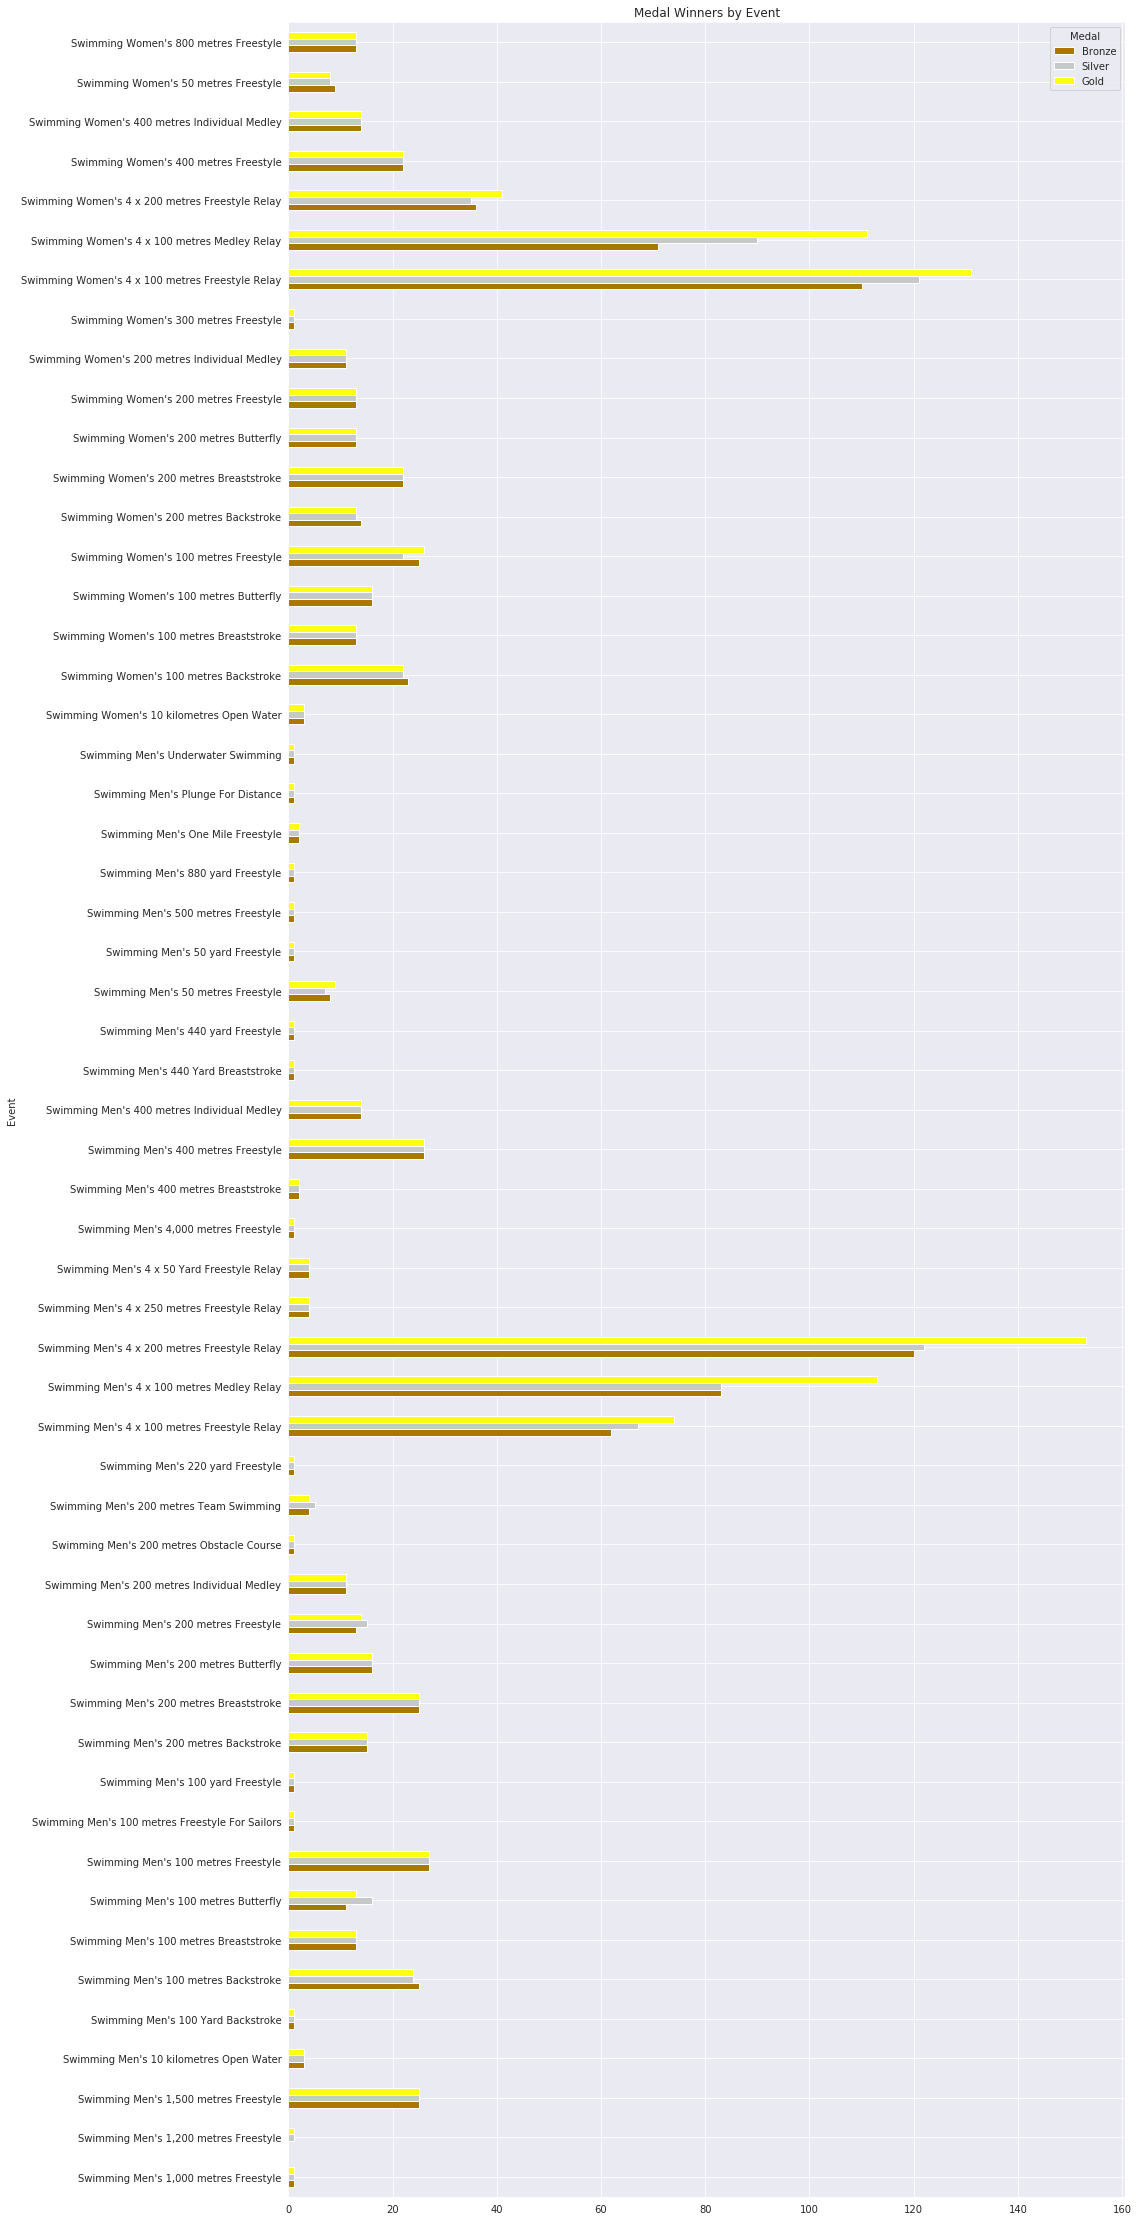

In [33]:
(medals.groupby(["Event","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='barh',color=mcolors,figsize=(15,40))
plt.title('Medal Winners by Event')
plt.xticks(rotation=0)

### c) Exloring Missing data 

In [35]:
###Number of missing data
swimming.isnull().sum()

ID                  0
Name                0
Sex                 0
Age               524
Height           4045
Weight           4391
Team                0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal           20147
region            147
notes           22680
Weight_Range     4391
dtype: int64

In [32]:
### Count for complete data through years
check = swimming.groupby('Year')[['Age','Weight','Height']].count()
check.tail()

,Age,Weight,Height
Year,,,
2000,1741,1716,1718
2004,1618,1611,1612
2008,1749,1722,1726
2012,1538,1518,1522
2016,1568,1535,1535


In [33]:
check['Total attendants'] = swimming['Year'].value_counts()


### *Plot non-missing data vs Total attendants*

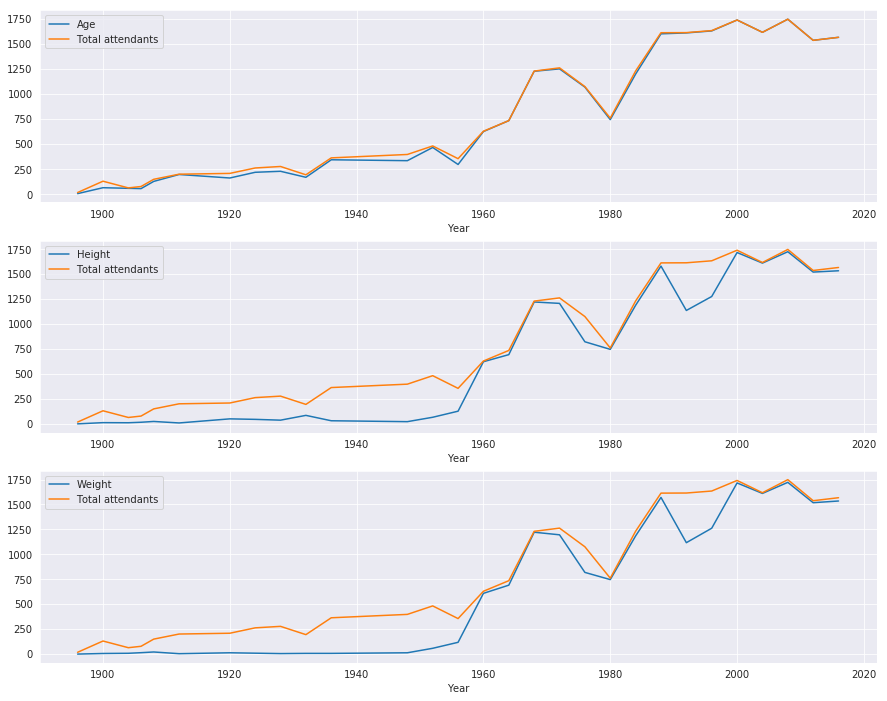

In [34]:
a4_dims = (15, 12)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
check.plot.line(ax = axes[0],y=['Age','Total attendants'])
check.plot.line(ax = axes[1],y=['Height','Total attendants'])
check.plot.line(ax = axes[2],y=['Weight','Total attendants'])

In [35]:
check['non-null Age'] = check['Age']/check['Total attendants']
check['non-null Height'] = check['Height']/check['Total attendants']
check['non-null Weight'] = check['Weight']/check['Total attendants']
check.head()

,Age,Weight,Height,Total attendants,non-null Age,non-null Height,non-null Weight
Year,,,,,,,
1896,7,0,0,18,0.388889,0.000000,0.000000
1900,66,6,12,131,0.503817,0.091603,0.045802
1904,60,8,11,64,0.937500,0.171875,0.125000
1906,57,14,16,78,0.730769,0.205128,0.179487
1908,129,21,24,150,0.860000,0.160000,0.140000


### *Percentage of non-missing data through years*

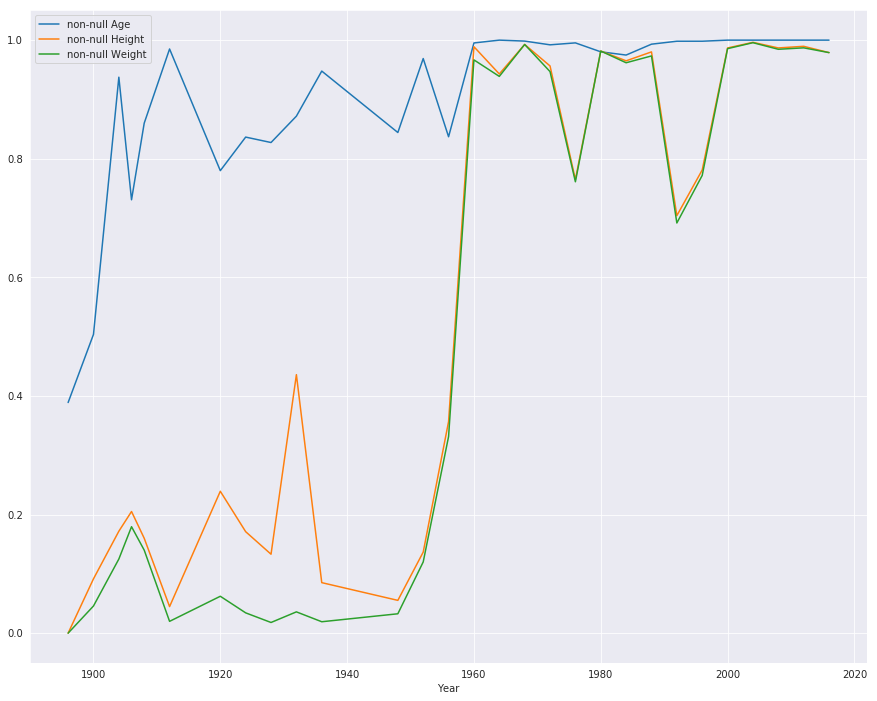

In [36]:
a4_dims = (15, 12)
fig, axes = plt.subplots(figsize=a4_dims)
check.plot.line(ax=axes,y=['non-null Age','non-null Height','non-null Weight'])

Until 1960, there were lots of missing Height and Weight data.

## 3. Preparing data

### *Entries Before 1960 are dropped*

In [37]:
swimmingFrom60 = pd.DataFrame(swimming[swimming['Year']>=1960])
swimmingFrom60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 100 to 271088
Data columns (total 18 columns):
ID              20007 non-null int64
Name            20007 non-null object
Sex             20007 non-null object
Age             19924 non-null float64
Height          18615 non-null float64
Weight          18521 non-null float64
Team            20007 non-null object
NOC             20007 non-null object
Games           20007 non-null object
Year            20007 non-null int64
Season          20007 non-null object
City            20007 non-null object
Sport           20007 non-null object
Event           20007 non-null object
Medal           2430 non-null object
region          19862 non-null object
notes           439 non-null object
Weight_Range    18521 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 2.9+ MB


### *Replace NaN value in Medal column*

In [38]:
swimmingFrom60['Medal'].fillna(value='No Medal',inplace = True)

### *Look for data with 3 Nan value in Age, Weight, Height*

In [39]:
a = swimmingFrom60.loc[(swimmingFrom60['Age'].isnull()) & 
                       (swimmingFrom60['Height'].isnull())& 
                       (swimmingFrom60['Weight'].isnull())]
print('Type of medal:',a['Medal'].unique())
a.info()

Type of medal: ['No Medal']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 3403 to 264588
Data columns (total 18 columns):
ID              62 non-null int64
Name            62 non-null object
Sex             62 non-null object
Age             0 non-null float64
Height          0 non-null float64
Weight          0 non-null float64
Team            62 non-null object
NOC             62 non-null object
Games           62 non-null object
Year            62 non-null int64
Season          62 non-null object
City            62 non-null object
Sport           62 non-null object
Event           62 non-null object
Medal           62 non-null object
region          62 non-null object
notes           0 non-null object
Weight_Range    0 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 9.2+ KB


Only 62 entries have missing values all Age, Weight, Height; Contain only 'No medal'. Therefore we can **drop** this data without creating much bias

After that, there are still missing data from Age, Height, Weight and region

In [40]:
s60 = swimmingFrom60.loc[(swimmingFrom60['Age'].notnull()) | 
                       (swimmingFrom60['Height'].notnull()) | 
                       (swimmingFrom60['Weight'].notnull())]
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 18 columns):
ID              19945 non-null int64
Name            19945 non-null object
Sex             19945 non-null object
Age             19924 non-null float64
Height          18615 non-null float64
Weight          18521 non-null float64
Team            19945 non-null object
NOC             19945 non-null object
Games           19945 non-null object
Year            19945 non-null int64
Season          19945 non-null object
City            19945 non-null object
Sport           19945 non-null object
Event           19945 non-null object
Medal           19945 non-null object
region          19800 non-null object
notes           439 non-null object
Weight_Range    18521 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 2.9+ MB


### *Fill in NaN value in region by copying the Team name*

In [41]:
s60['region'].fillna(value=0,inplace= True)

In [42]:
s60['region'] = s60.apply(lambda row: row['Team'] 
                          if row['region']==0
                         else row['region'],axis =1)

### *Imputation for Age, Weight, Height columns*

Calculate average Age/Height/Weight per Year by Gender (table 1)

In [43]:
average = s60.groupby(['Year','Sex'])[['Age','Weight','Height']].mean().unstack()
average.head()

Age                Weight                 Height            
Sex           F          M          F          M           F           M
Year                                                                    
1960  18.104418  20.195767  61.060729  74.331492  166.818548  178.920000
1964  17.945455  20.078091  60.270588  74.706422  167.341176  179.298405
1968  17.157598  19.706897  59.233459  73.800866  167.497164  179.855700
1972  17.120000  19.662242  58.627542  73.816031  167.567766  181.306647
1976  16.810757  19.383128  58.806841  73.386646  168.647887  182.030675

Calculate Average Age/Height/Weight per Year by Gender across the Countries (table 2)

In [44]:
country = s60.groupby(['Year','region','Sex'])[['Age','Height','Weight']].mean().unstack()
country.head()

Age                 Height             Weight           
Sex                     F          M           F           M      F          M
Year region                                                                   
1960 Argentina        NaN  16.500000         NaN  175.000000    NaN  68.250000
     Australia  18.190476  19.560000  167.285714  182.217391   62.8  78.619048
     Austria    19.166667  21.666667  165.166667  180.000000   61.0  68.666667
     Belgium    16.000000  19.000000  161.000000  180.000000   63.0  72.500000
     Brazil           NaN  17.444444         NaN  182.888889    NaN        NaN

Function: if data is missing, we impute with the value in "table 1". If the value in "table 1 is also missing, use the value in "table 2" for imputation


In [45]:
def func(val,val_class,year,region,sex):
    if not (np.isnan(val)):
        return val
    else:
        if not (np.isnan(country.loc[(year,region),(val_class,sex)])):
            return country.loc[(year,region),(val_class,sex)]
        else:
            return average.loc[year,(val_class,sex)]

In [46]:
missing_list = ['Age','Height','Weight']
for i in missing_list:
    s60[i]=s60.apply(lambda row: 
                 func(row[i],i,row['Year'],row['region'],row['Sex'])
                 ,axis = 1)

### *All the Nan values are filled*

In [47]:
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 18 columns):
ID              19945 non-null int64
Name            19945 non-null object
Sex             19945 non-null object
Age             19945 non-null float64
Height          19945 non-null float64
Weight          19945 non-null float64
Team            19945 non-null object
NOC             19945 non-null object
Games           19945 non-null object
Year            19945 non-null int64
Season          19945 non-null object
City            19945 non-null object
Sport           19945 non-null object
Event           19945 non-null object
Medal           19945 non-null object
region          19945 non-null object
notes           439 non-null object
Weight_Range    18521 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 2.9+ MB


Round up number

In [48]:
s60 = round(s60)

In [49]:
s60.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Weight_Range
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,No Medal,Netherlands,NaN,70kg-80kg
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,No Medal,Netherlands,NaN,70kg-80kg
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal,Netherlands,NaN,70kg-80kg
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,No Medal,Netherlands,NaN,70kg-80kg
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal,Netherlands,NaN,70kg-80kg


In [50]:
##### Function to use if consider country factor
# countryArray = s60['region'].unique()
# def regionReplace(country):
#     arr = np.where(countryArray == country)
#     return arr[0][0]
# s60['region'] = s60.apply(lambda row: regionReplace(row['region']),axis=1)


### *Tag event and sex with numeric labels*

In [51]:
### Numeric labels for event
eventArray = s60['Event'].unique()
def eventReplace(event):
    arr = np.where(eventArray == event)
    return arr[0][0]
s60['Event'] = s60.apply(lambda row: eventReplace(row['Event']),axis=1)
s60.replace(['M','F'],[1,0],inplace=True)


### *Classifying Medal into 'Medalist' and 'No Medal'*

In [74]:
s60.replace(['Gold','Silver','Bronze'],'Medalist',inplace=True)

## 4. Machine Learning Model

### Imbalanced data problem: non-medalist vs medalists

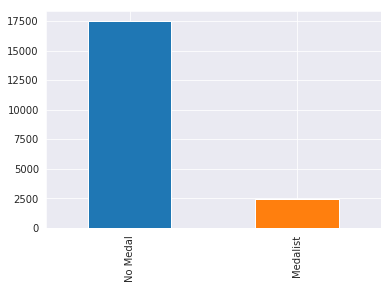

In [75]:
s60['Medal'].value_counts().reindex(index=['No Medal','Medalist']).plot(kind='bar')

### *Using oversampling technique SMOTE NC and ADASYN to later balance the TRAIN dataset*

In [53]:
### Function for SMOTE NC 
def oversampling(X,y,binary):
    bin_imb = pd.DataFrame(X[['Age','Weight','Height','Event','Sex']])
    bin_y=y.copy()
#     if binary:
#         bin_y.replace(['Gold','Silver','Bronze'],'Medalist',inplace=True)
    ### Using SMOTENC from imblearn
    from imblearn.over_sampling import SMOTENC
    sm = SMOTENC(categorical_features=[3,4])
    bin_X, bin_y = sm.fit_resample(bin_imb,bin_y.ravel())
    bin_X = pd.DataFrame(data=bin_X,columns=[['Age','Weight','Height','Event','Sex']])
    return bin_X,bin_y

def BMI_oversampling(X,y,binary):
    bin_imb = pd.DataFrame(X[['Weight','Height']])
    bin_y=y.copy()
#     if binary:
#         bin_y.replace(['Gold','Silver','Bronze'],'Medalist',inplace=True)
    ### Using SMOTENC from imblearn
    from imblearn.over_sampling import ADASYN
    sm = ADASYN()
    bin_X, bin_y = sm.fit_resample(bin_imb,bin_y.ravel())
    bin_X = pd.DataFrame(data=bin_X,columns=[['Weight','Height']])
    bin_X['BMI'] = bin_X['Weight'].values/((bin_X['Height'].values/100)**2)
    return bin_X['BMI'],bin_y

### a. Decision Tree 

### Univariate Decision Tree: Using 1 feature BMI

In [54]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import export_graphviz
import graphviz


df = s60.copy()


In [55]:
# Split the Dataset into Train and Test
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(df.drop(['Medal'],axis=1), df['Medal'], test_size = 0.15)
X_train = X_full_train.copy()
X_test = X_full_test.copy()
y_train = y_full_train.copy()
y_test = y_full_test.copy()
# Draw the distribution of Response
# f, axes = plt.subplots(2, 1, figsize=(18, 15))
# y_train.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[0])
# y_test.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[1])


In [56]:
### Prepare train and test dataset
X_uni_train,y_uni_train = BMI_oversampling(X_train,y_train,True)

###Calculate BMI for test dataset
X_test['BMI']=X_test['Weight']/((X_test['Height']/100)**2)
X_uni_test= pd.DataFrame(X_test['BMI'])
y_uni_test = y_test.copy()


In [57]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_uni_train, y_uni_train)                    # train the decision tree model


# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_uni_train)
y_test_pred = dectree.predict(X_uni_test)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5319177217293058
Classification Recall 		: 0.8947437582128778

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.24632352941176472
Classification Recall 		: 0.8828571428571429



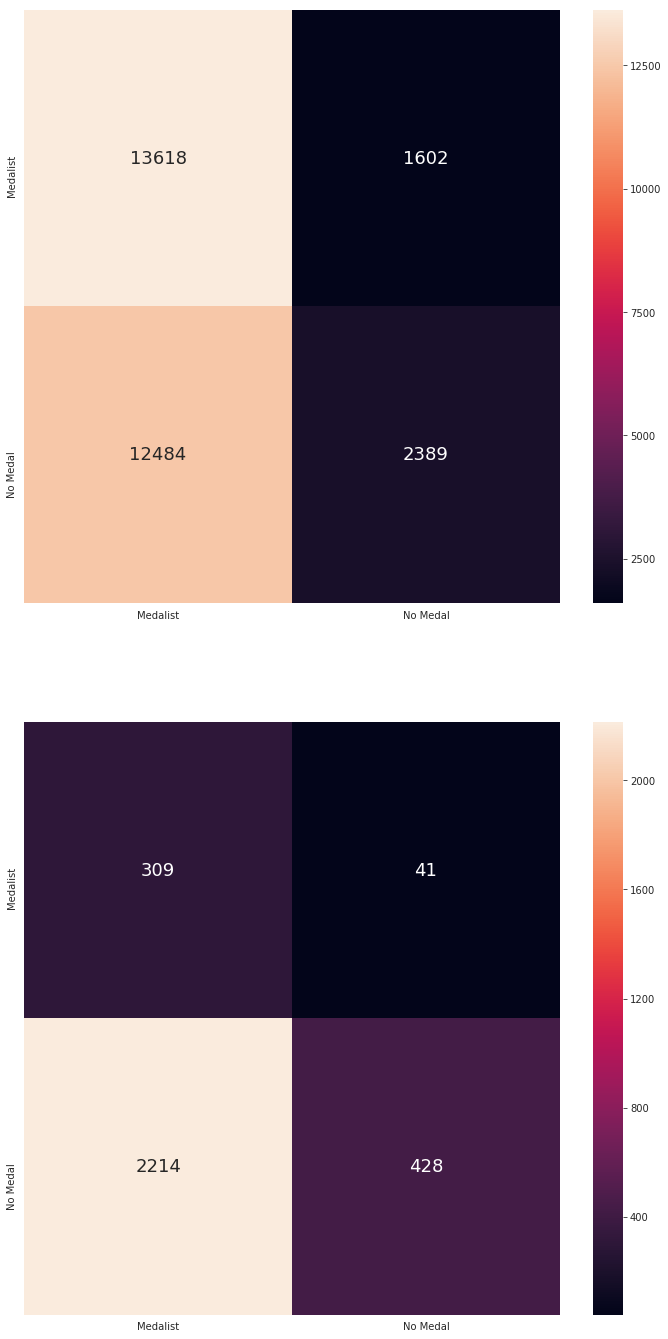

In [58]:
labels = ['Medalist','No Medal']
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_uni_train, y_uni_train))
print("Classification Recall \t\t:", recall_score(y_uni_train, y_train_pred,labels = labels,pos_label='Medalist'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_uni_test, y_uni_test))
print("Classification Recall \t\t:", recall_score(y_uni_test, y_test_pred,labels = labels,pos_label='Medalist'))
print()

# Plot the Confusion Matrix for Train and Test
df_cm1 = pd.DataFrame(confusion_matrix(y_uni_train, y_train_pred,labels=labels),index=labels,columns=labels)
df_cm2 = pd.DataFrame(confusion_matrix(y_uni_test, y_test_pred,labels=labels),index=labels,columns=labels)

f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(df_cm1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(df_cm2, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

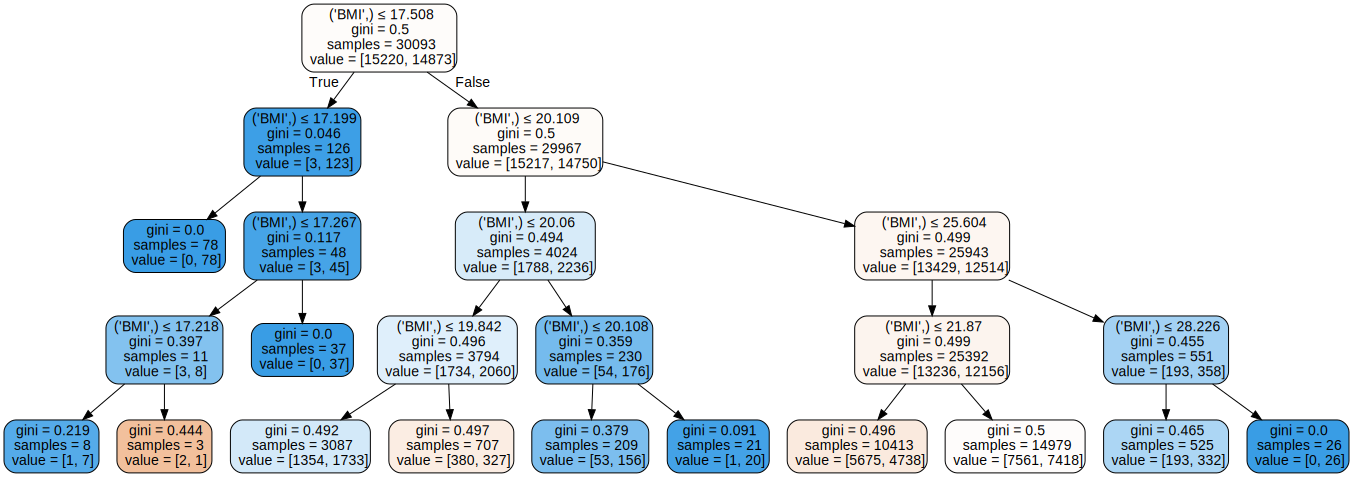

In [59]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_uni_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Multivariate Decision Tree: Using 5 features (Age, Weight, Height, Event, Sex)

In [60]:
X_train = X_full_train.copy()
X_test = X_full_test.copy()
y_train = y_full_train.copy()
y_test = y_full_test.copy()
### Prepare train and test dataset
X_mul_train,y_mul_train = oversampling(X_train,y_train,True)

### Test
X_mul_test = pd.DataFrame(X_test[['Age','Weight','Height','Event','Sex']])
y_mul_test = y_test.copy()


In [61]:
# Decision Tree using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree1.fit(X_mul_train, y_mul_train)                    # train the decision tree model


# Predict Response corresponding to Predictors
y_train_pred = dectree1.predict(X_mul_train)
y_test_pred = dectree1.predict(X_mul_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6414307806091575
Classification Recall 		: 0.7738183285147583

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5317513368983957
Classification Recall 		: 0.6542857142857142



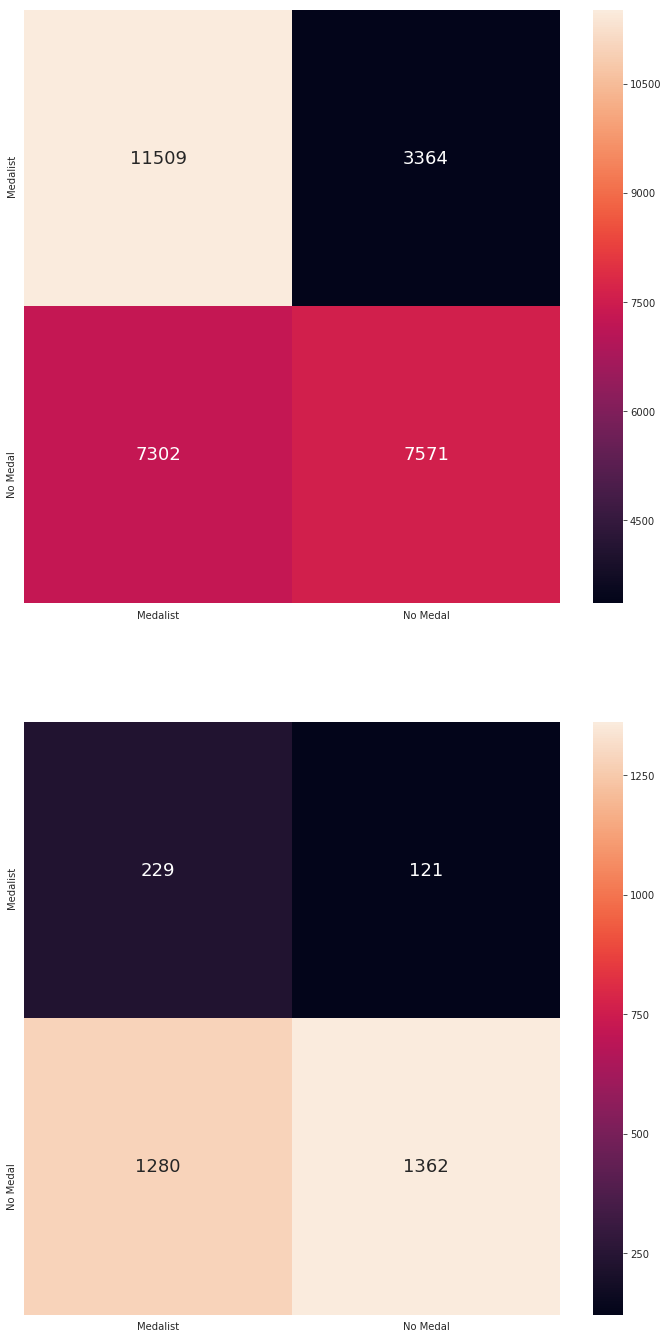

In [62]:
labels = ['Medalist','No Medal']

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_mul_train, y_mul_train))
print("Classification Recall \t\t:", recall_score(y_mul_train, y_train_pred,labels = labels,pos_label='Medalist'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_mul_test, y_mul_test))
print("Classification Recall \t\t:", recall_score(y_mul_test, y_test_pred,labels = labels,pos_label='Medalist'))

print()

df_cm1 = pd.DataFrame(confusion_matrix(y_mul_train, y_train_pred,labels=labels),index=labels,columns=labels)
df_cm2 = pd.DataFrame(confusion_matrix(y_mul_test, y_test_pred,labels=labels),index=labels,columns=labels)
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(df_cm1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(df_cm2, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

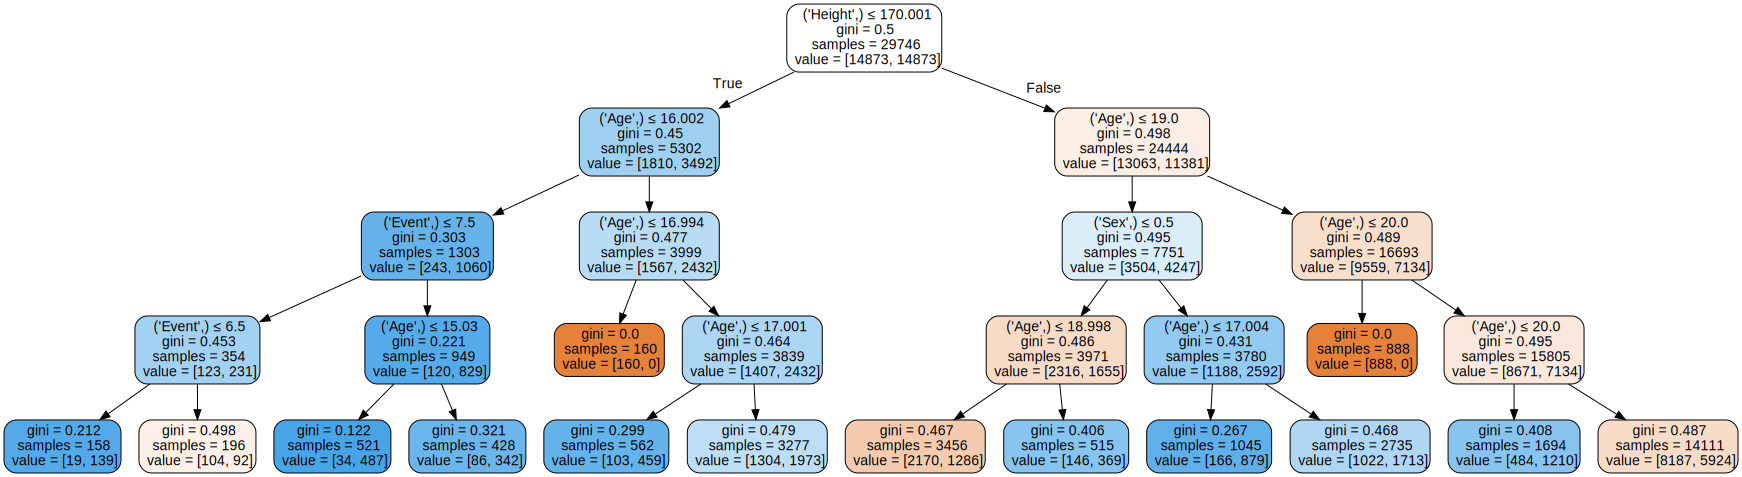

In [63]:
# Plot the Decision Tree
treedot = export_graphviz(dectree1,                                      # the model
                          feature_names = X_mul_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### b. Random Forest: Using 5 features (Age, Weight, Height, Sex and Event)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

In [65]:
# Split the Dataset into Train and Test
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['Medal'],axis=1), df['Medal'], test_size = 0.1)
# Draw the distribution of Response
# f, axes = plt.subplots(2, 1, figsize=(18, 15))
# y_train.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[0])
# y_test.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[1])
X_train = X_full_train.copy()
X_test = X_full_test.copy()
y_train = y_full_train.copy()
y_test = y_full_test.copy()

In [66]:

### Prepare train and test dataset
X_for_train,y_for_train = oversampling(X_train,y_train,True)

### Test
X_for_test = pd.DataFrame(X_test[['Age','Weight','Height','Event','Sex']])
y_for_test = y_test.copy()


In [67]:
## Train model
forest = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=4)
forest.fit(X_for_train,y_for_train)

# Predict Response corresponding to Predictors
y_train_pred_for = forest.predict(X_for_train)
y_test_pred_for = forest.predict(X_for_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6745444765682781
Classification Recall 		: 0.7738183285147583

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6564171122994652
Classification Recall 		: 0.6542857142857142



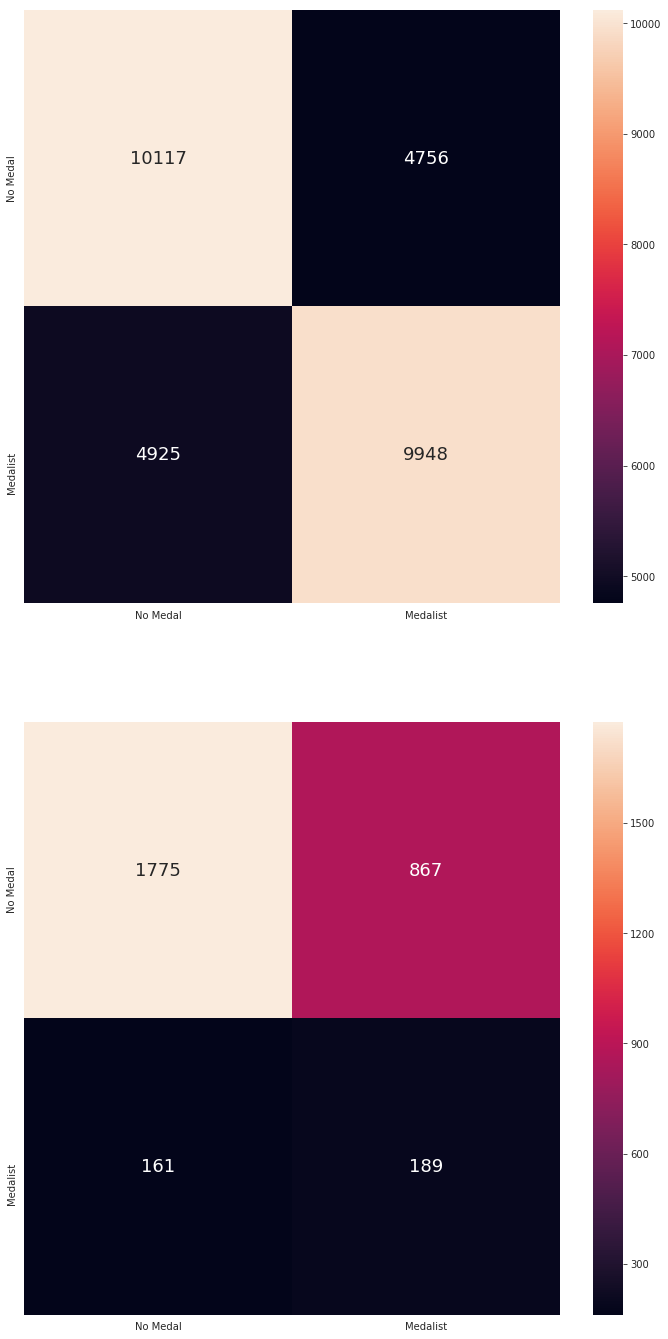

In [68]:
labels = ['No Medal','Medalist']
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", forest.score(X_for_train, y_for_train))
print("Classification Recall \t\t:", recall_score(y_for_train, y_train_pred,labels = labels,pos_label='Medalist'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", forest.score(X_for_test, y_for_test))
print("Classification Recall \t\t:", recall_score(y_for_test, y_test_pred,labels = labels,pos_label='Medalist'))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
for_df_cm1 = pd.DataFrame(confusion_matrix(y_for_train, y_train_pred_for,labels=labels),index=labels,columns=labels)
for_df_cm2 = pd.DataFrame(confusion_matrix(y_for_test, y_test_pred_for,labels=labels),index=labels,columns=labels)

sb.heatmap(for_df_cm1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(for_df_cm2, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


### c. Logistic Regression: Using 5 features (Age, Weight, Height, Sex and Event)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
# Split the Dataset into Train and Test
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['Medal'],axis=1), df['Medal'], test_size = 0.1)
# Draw the distribution of Response
# f, axes = plt.subplots(2, 1, figsize=(18, 15))
# y_train.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[0])
# y_test.value_counts().reindex(index=['No Medal','Gold','Silver','Bronze']).plot(kind='bar',ax=axes[1])
X_train = X_full_train.copy()
X_test = X_full_test.copy()
y_train = y_full_train.copy()
y_test = y_full_test.copy()

In [71]:

### Prepare train and test dataset
X_log_train,y_log_train = oversampling(X_train,y_train,True)

### Test
X_log_test = pd.DataFrame(X_test[['Age','Weight','Height','Event','Sex']])
y_log_test = y_test.copy()


In [72]:
## Train model
logreg = LogisticRegression(C=1e5,solver='lbfgs', multi_class='multinomial',max_iter = 1000)
logreg.fit(X_log_train,y_log_train)

# Predict Response corresponding to Predictors
y_train_pred_log = logreg.predict(X_log_train)
y_test_pred_log = logreg.predict(X_log_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6052914677603711
Classification Recall 		: 0.6039803671081826

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6012700534759359
Classification Recall 	 	: 0.6257142857142857



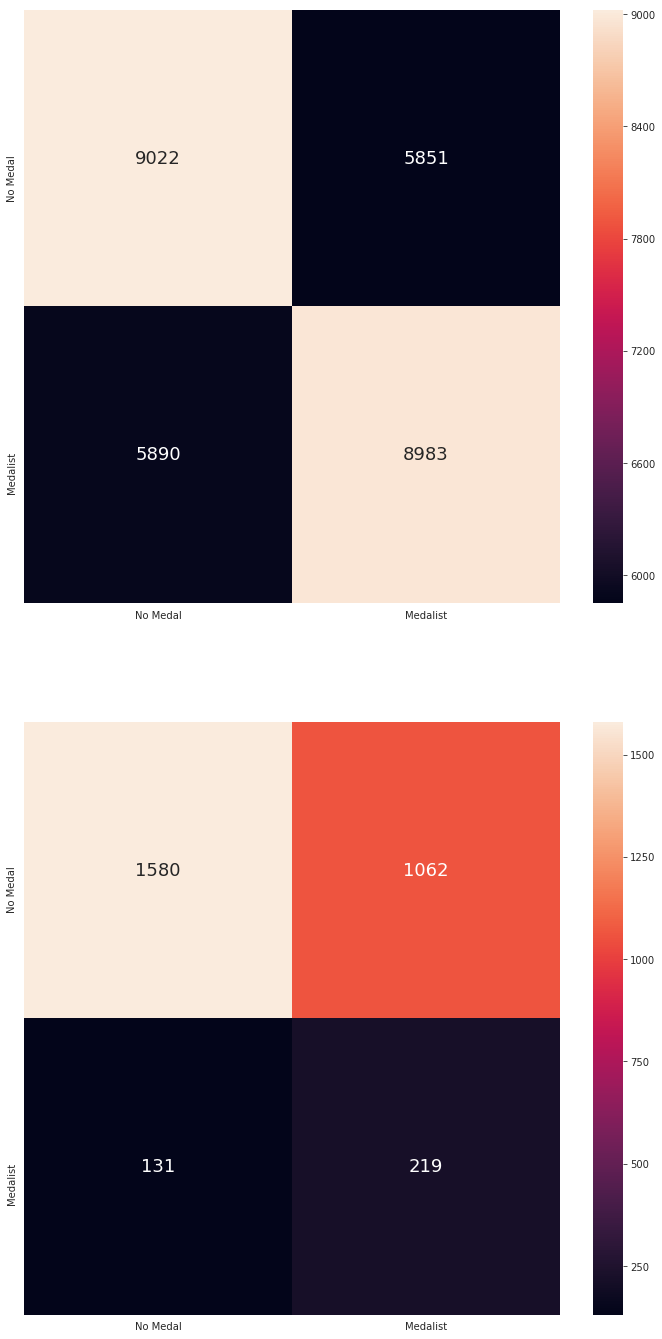

In [73]:
# Check the Goodness of Fit (on Train Data)
labels = ['No Medal','Medalist']
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_log_train, y_log_train))
print("Classification Recall \t\t:", recall_score(y_log_train, y_train_pred_log,labels = labels,pos_label='Medalist'))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_log_test, y_log_test))
print("Classification Recall \t \t:", recall_score(y_log_test, y_test_pred_log,labels = labels,pos_label='Medalist'))

print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
log_df_cm1 = pd.DataFrame(confusion_matrix(y_log_train, y_train_pred_log,labels=labels),index=labels,columns=labels)
log_df_cm2 = pd.DataFrame(confusion_matrix(y_log_test, y_test_pred_log,labels=labels),index=labels,columns=labels)

sb.heatmap(log_df_cm1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(log_df_cm2, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])